# Ultimate Data Science Challenge

---

## Part 1 - Exploratory Data Analysis

### Problem Statement

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import warnings
import pandas as pd

# Supress FutureWarning warnings
_ = warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
login_df = pd.read_json('logins.json')
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
login_df = login_df.sort_values('login_time')
login_df.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [4]:
'''
login_agg takes the login_df from the json file and performs a count aggregate over the desired time difference
'''
def login_agg(login_df, t):
    # Initialize the login counts DataFrame
    login_counts_df = pd.DataFrame(columns=['start_time', 'end_time', 'counts'])
    # Initialize tracking variables
    login_counts_idx = 0
    count = 0
    start = end = login_df.loc[0, 'login_time']
    for row in login_df.iterrows():
        end = row[1]['login_time']
        # Get the time difference between start and end points
        delta = end - start
        # Reassign end_time and count if the time difference is less than the time delta
        if delta < t:
            end_time = end
            count += 1
        # Add the count to a row of login_counts if the time difference is greater than or equal to time delta
        elif delta >= t and start != end:
            # Add a row to the login_counts dataframe if the count of logins is non-zero between time points
            if count != 0:
                login_counts_df.loc[login_counts_idx] = [start] + [end_time] + [count]
            start = end
            login_counts_idx += 1
            count = 0
    return login_counts_df

In [5]:
import matplotlib.pyplot as plt

In [6]:
'''
plot_time_period accepts the formatted aggregated count DataFrame returned from login_df and plots the
given number of cycles from the DataFrame in separate plots with a specified number of points per subplot
'''
def plot_time_period(agg_df, cycles, num_points, title, xlabel, dt_format, figsize=(10,10)):
    fig, axs = plt.subplots(cycles, 1, figsize=figsize)
    if cycles > 1:
        for i in range(cycles):
            # Create a list of string formatted datetimes over the course of a cycle
            date_time_list = []
            for dt in agg_df.start_time[num_points*i:num_points*(i+1)]:
                date_time = dt.strftime(dt_format)
                date_time_list.append(date_time)
            # Use datetime strings as xtick labels
            _ = axs[i].plot(date_time_list, agg_df.counts[num_points*i:num_points*(i+1)])
            _ = axs[i].set_xticklabels(date_time_list, rotation=45)
    else:
        # Format date times into string
        date_time_list = []
        for dt in agg_df.start_time[0:num_points]:
            date_time = dt.strftime(dt_format)
            date_time_list.append(date_time)
        # Use datetime strings as x tick labels
        _ = axs.plot(date_time_list, agg_df.counts[0:num_points])
        _ = axs.set_xticklabels(date_time_list, rotation=45)
    _ = plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1)
    _ = fig.suptitle(title, y=1.05, fontsize=20)
    fig.text(0.5, -0.03, xlabel, ha='center', fontsize=16)
    fig.text(-0.03, 0.5, 'Number of Logins', va='center', rotation='vertical', fontsize=16)
    plt.show()

---

### Daily Trends Over the Week

In [7]:
# Aggregate logins over 24 hr time periods
t = pd.Timedelta('24:00:00')
daily_agg_df = login_agg(login_df, t)
daily_agg_df.head()

,start_time,end_time,counts
0,1970-01-01 20:13:18,1970-01-02 20:12:42,595
1,1970-01-02 20:15:08,1970-01-03 20:06:46,819
2,1970-01-03 20:15:09,1970-01-04 20:10:45,876
3,1970-01-04 20:22:24,1970-01-05 20:10:05,462
4,1970-01-05 20:26:26,1970-01-06 20:24:33,451


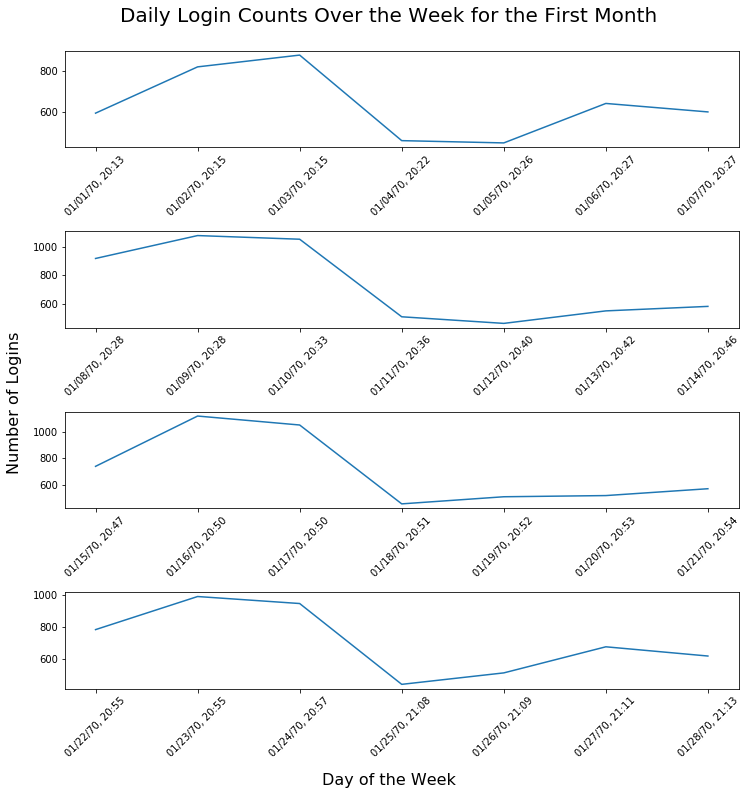

In [8]:
# Plot the daily login counts over the course of the first month
cycles = 4
num_points = 7
title = 'Daily Login Counts Over the Week for the First Month'
xlabel = 'Day of the Week'
dt_format = "%m/%d/%y, %H:%M"
_ = plot_time_period(daily_agg_df, cycles, num_points, title, xlabel, dt_format)

The first data point for these subplots correspond to the aggregated login counts from around 8PM Thursday to around 8PM Friday. What these plots show us is that the user base is most active on Friday through Sunday and drops off significantly on Monday. User activity varies throughout the week but consistently returns to peak login counts on Friday.

### Weekly Trends for the First Four Month

In [9]:
# Aggregate logins over weekly time periods
t = pd.Timedelta('168:00:00')
weekly_agg_df = login_agg(login_df, t)
weekly_agg_df.head()

,start_time,end_time,counts
0,1970-01-01 20:13:18,1970-01-08 20:10:04,4442
1,1970-01-08 20:13:49,1970-01-15 20:12:30,5158
2,1970-01-15 20:16:05,1970-01-22 20:15:09,4959
3,1970-01-22 20:17:30,1970-01-29 20:16:18,4978
4,1970-01-29 20:21:35,1970-02-05 20:18:12,4600


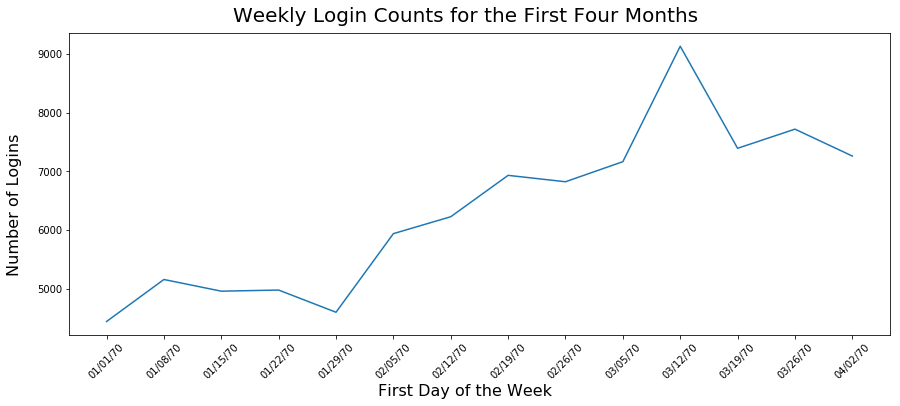

In [10]:
# Plot the weekly login counts over the course of the first four months
cycles = 1
num_points = 16
title = 'Weekly Login Counts for the First Four Months'
xlabel = 'First Day of the Week'
dt_format = "%m/%d/%y"
_ = plot_time_period(weekly_agg_df, cycles, num_points, title, xlabel, dt_format, figsize=(12,5))

Expanding the login counts to a weekly aggregation, we can see that the overall popularity of the service has gone up over the course of the first four months of recorded login activity. The service didn't see much growth for the first month of recorded login activity, but the popularity of the service has risen after that point. There was an anomalous spike in logins for the week between 3/05 and 3/12, but as new users left, some stayed around and contributed to the consistent growth of the service. 

## Part 2 - Experiment and Metrics Design

### Problem Statement

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key measure of success for this experiment is the difference between driver partner entries to and from the two ultimate cities. We're choosing this metric because we want to see if reimbursing the toll for driver partners from the toll bridge will encourage driver partners from the two cities to commmute back and forth.

### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success.

To compare the effectiveness of lifting the toll from the toll bridge between Ultimate Gotham and Ultimate Metropolis, we want to measure the difference in the average number of drivers that commute between the two cities via the bridge before and after reimbursing the toll.

Empirically, we are going to measure the average difference in daily toll bridge usage using a Z-Test. To measure the average difference with a Z-Test, we have to meet two conditions:


1. The counts for the toll bridge use are indpendent from one another. Because we're counting the number of driver partners that are passing on each day separately and the driver partners are operating independently from one another, then it should be safe to assume that the counts are independent.

2. We get a sufficiently large sample size. According to the Central Limit Theorem, if we count the number of driver partners that pass the bridge for more than 30 days with and without the toll, then we can safely assume that the distribution will be approximately normal and the assumptions for a Z-Test are valid.

To determine whether or not lifting the toll effectively changes the behavior of driver partners and encourages them to commute to and from the two cities, our null hypothesis will assume that lifting the toll does not make a measurable difference in the driver partners' behavior. We will reject our null hypothesis if the alpha value of our Z-Test is less than 0.05.

In order to conduct this test, follow these steps:

1. Count the number of driver partners that commute to and from Gotham and Metropolis via the toll bridge over 24 hour periods for 31 days.

2. Reimburse the toll costs for the driver partners and count the number of driver partners that commute between the two cities over 24 hour periods for another 31 days.

3. Take the average and standard deviation for each individual test.

4. Find the difference between these two averages and the combined standard error.

5. Taking the Null Hypothesis into consideration that there is no measurable difference with and without the toll, find the p-value from the test.

6. If the p-value is less than 0.05, then we will reject the assumption that there is no measurable difference by reimbursing driver partners from the toll cost in favor for the alternative that reimbursing the toll cost changes the driver partners' behavior.

# Part 3 - Predictive Modeling

### Problem Statement

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

---

#### Finding Fraction of Retained Users

In [11]:
import json

In [12]:
# Import the data from JSON file into a Pandas DataFrame
with open('ultimate_data_challenge.json') as f:
   d = json.load(f)
rider_df = pd.DataFrame(d)
rider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [13]:
import numpy as np
from datetime import datetime

In [14]:
# Clean the DataFrame

# Convert string datetimes to datetime objects
rider_df.last_trip_date = pd.to_datetime(rider_df.last_trip_date)
rider_df.signup_date = pd.to_datetime(rider_df.signup_date)

# Create a True/False column that specifies if the rider retained for the month of June 2014
retained_date = datetime(2014, 6, 1)
mask = rider_df.last_trip_date >= retained_date
rider_df['retained'] = mask

# Fill null values for average ratings w/ avg ratings of users and drivers
rider_df['avg_rating_by_driver'] = rider_df['avg_rating_by_driver'].fillna(np.mean(rider_df.avg_rating_by_driver))
rider_df['avg_rating_of_driver'] = rider_df['avg_rating_of_driver'].fillna(np.mean(rider_df.avg_rating_of_driver))
rider_df['phone'] = rider_df['phone'].fillna('N/A')
rider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.3+ MB


In [15]:
retained_count = rider_df.loc[rider_df.retained==True, :]['retained'].count()
non_retained_count = rider_df.loc[rider_df.retained==False, :]['retained'].count()
print(f'Number of Riders Retained: {retained_count}')
print(f'Percentage of Riders Retained:{retained_count/(retained_count + non_retained_count)*100: .2f}%')

Number of Riders Retained: 18804
Percentage of Riders Retained: 37.61%


---

#### Determining the Most Important Features

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

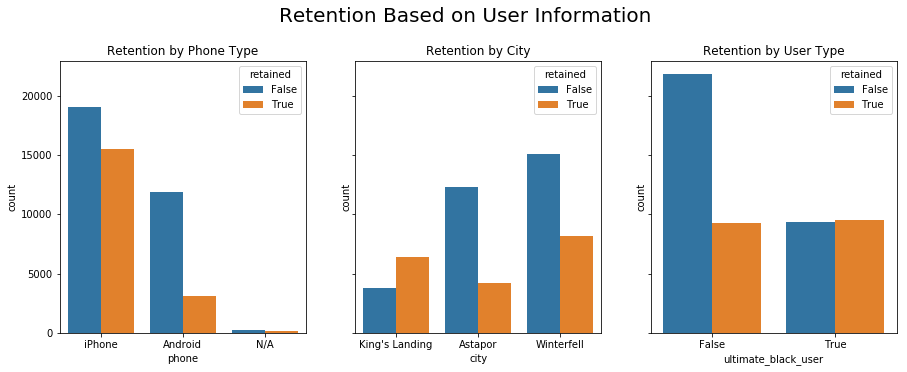

In [17]:
# Plot retention by categorical data
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

_ = sns.catplot(x="phone", hue='retained', kind="count", ax=axs[0], data=rider_df)
_ = axs[0].title.set_text('Retention by Phone Type')

_ = sns.catplot(x="city", hue='retained', kind="count", ax=axs[1], data=rider_df)
_ = axs[1].title.set_text('Retention by City')

_ = sns.catplot(x="ultimate_black_user", hue='retained', kind="count", ax=axs[2], data=rider_df)
_ = axs[2].title.set_text('Retention by User Type')

_ = fig.suptitle('Retention Based on User Information', y=1.03, fontsize=20)
_ = plt.close(2)
_ = plt.close(3)
_ = plt.close(4)

The visualizations on categorical columns of our data show a few key trends.

First, regardless of phone type, more users that signed up on January 2014 did not retain. For iPhone users, the ratio of users that left vs. retained was at around a 60-40 split, while the ratio for Android users was much worse at around an 80-20 split. This information suggests that the user experience for Android users is worse than the user experience for iPhone users.

The next plot shows user retention categorized by city. Here, users from King's Landing were more likely to retain than stop using the ride sharing app. We should look at this as a sign that there is a greater need for the ride share app in King's Landing than the two other cities in question.

The third plot looks at the user type and whether or not they are an ultimate black user. Only around 25% of the users who are not Ultimate Black ended up using the service in the past month. Ultimate black users retained and left the service at around the same ratio.

These plots suggest that if the user has an Android phone, lives in Astapor or Winterfell, and/or is not an ultimate black user, then they are very likely to not be considered an active user. Conversely, if the user is from King's landing, then it's a good bet that they are an active user of the ride share app.

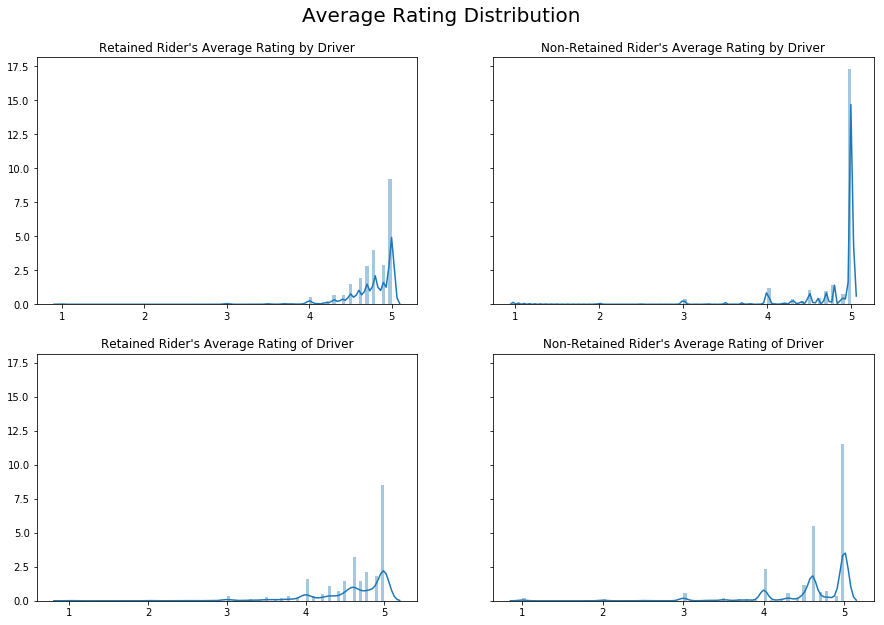

In [18]:
# Plot retention by user and driver ratings
fig, axs = plt.subplots(2, 2, figsize=(15,10), sharey=True)

#
x = rider_df.loc[rider_df.retained == True, :]
x = x.avg_rating_by_driver[x.avg_rating_by_driver != 'N/A'].values
x = [float(i) for i in x] 
_ = sns.distplot(x, bins=100, ax=axs[0][0])
_ = axs[0][0].title.set_text('Retained Rider\'s Average Rating by Driver')

x = rider_df.loc[rider_df.retained == False, :]
x = x.avg_rating_by_driver[x.avg_rating_by_driver != 'N/A'].values
x = [float(i) for i in x] 
_ = sns.distplot(x, bins=100, ax=axs[0][1])
_ = axs[0][1].title.set_text('Non-Retained Rider\'s Average Rating by Driver')

x = rider_df.loc[rider_df.retained == True, :]
x = x.avg_rating_of_driver[x.avg_rating_of_driver != 'N/A'].values
x = [float(i) for i in x] 
_ = sns.distplot(x, bins=100, ax=axs[1][0])
_ = axs[1][0].title.set_text('Retained Rider\'s Average Rating of Driver')

x = rider_df.loc[rider_df.retained == False, :]
x = x.avg_rating_of_driver[x.avg_rating_of_driver != 'N/A'].values
x = [float(i) for i in x] 
_ = sns.distplot(x, bins=100, ax=axs[1][1])
_ = axs[1][1].title.set_text('Non-Retained Rider\'s Average Rating of Driver')

_ = fig.suptitle('Average Rating Distribution', y=0.95, fontsize=20)
_ = plt.close(2)
_ = plt.close(3)
_ = plt.close(4)
_ = plt.close(5)

The distribution for average ratings for both the user and the drivers are fairly similar across the board. Regardless of whether or not the user retained, the average rating of the user is typically between 4 and 5. Drivers are also rated similarly by both retained and non-retained users. This suggests that the driver's and user's scores are independent of whether or not the user retains.

### 3. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Preprocess the DataFrame by cleaning categorical data entries
X = rider_df
X['retained'] = X['retained'].astype(int)
X['ultimate_black_user'] = X['ultimate_black_user'].astype(str)
X['signup_date'] = X['signup_date'].astype(str)
X = pd.get_dummies(X, drop_first=True)

y = X['retained']
X = X.drop(['retained', 'last_trip_date'], axis=1)
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_King's Landing,city_Winterfell,phone_N/A,...,signup_date_2014-01-23,signup_date_2014-01-24,signup_date_2014-01-25,signup_date_2014-01-26,signup_date_2014-01-27,signup_date_2014-01-28,signup_date_2014-01-29,signup_date_2014-01-30,signup_date_2014-01-31,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# Find the best ExtraTreesClassifier model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
model = ExtraTreesClassifier()
param_dist = {'max_depth': [3, None],
              "max_features": list(range(1,10)),
              "min_samples_leaf": list(range(1,10)),
              "criterion": ['gini','entropy']}
model_cv = GridSearchCV(model, param_dist, cv=5)
_ = model_cv.fit(X_train, y_train)

# Print the tuned parameters and average score from 5-Fold CV
print(f"Tuned Model Parameters: {model_cv.best_params_}")
print(f"Best Score: {model_cv.best_score_: .4f}")

Tuned Model Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 9}
Best Score:  0.7762


In [22]:
# Predict on testing data using trained model
y_pred = model_cv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Predicted Score on Testing Data: {score: .4f}")

Predicted Score on Testing Data:  0.7740


For my predictive model, I chose an Extra Trees Classifier. The Extra Trees Classifier provides an extra layer of randomness over the Random Forest Classifier by sampling from the entire training set after each split and choosing splits within the range of possible values completely at random. Greater randomness when fitting the model reduces overfitting the classifier while also lowering the variance on new data. I chose the Extra Trees Classifier because its prediction accuracy on the training data will be similar to new data that the classifier will receive. Between the holdout set and training set, there was only a 0.22% difference in accuracy. The accuracy can be further improved by training on more trees at the expense of taking more time to train.